# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [91]:
import numpy as np
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
import os

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

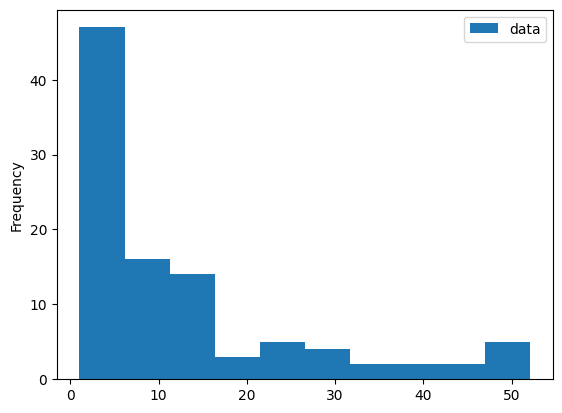

In [92]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

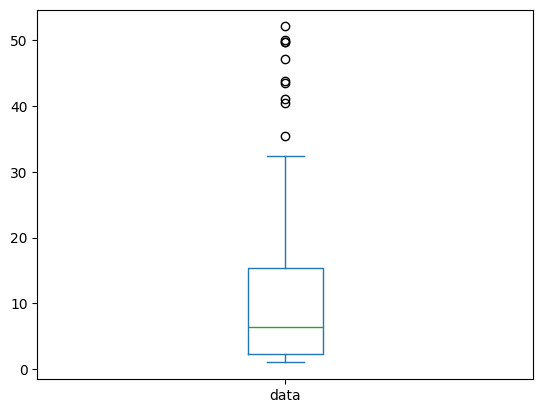

In [93]:
df.plot.box()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your own datasets that you found last semester.

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [94]:
# set variables
kaggle_dataset_path = "ramyhafez/bank-customer-churn"
kaggle_dataset_file_name = "Bank_Churn.csv"
print(f"Path to kaggle dataset: {kaggle_dataset_path}")
print(f"Kaggle dataset file name: {kaggle_dataset_file_name}")

# download the data set
kaggle_dataset_local_path = kagglehub.dataset_download(kaggle_dataset_path)
print(f"Path to downloaded file: {kaggle_dataset_local_path}")

# read csv file to pandas dataframe
kaggle_dataset_local_path_to_file = os.path.join(kaggle_dataset_local_path, kaggle_dataset_file_name)
kaggle_dataset_raw = pd.read_csv(kaggle_dataset_local_path_to_file)

# copy dataframe for EDA
dataset = kaggle_dataset_raw.copy()

# show top rows
dataset.head()


Path to kaggle dataset: ramyhafez/bank-customer-churn
Kaggle dataset file name: Bank_Churn.csv
Path to downloaded file: /home/codespace/.cache/kagglehub/datasets/ramyhafez/bank-customer-churn/versions/1


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [95]:
dataset.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [96]:
# Summarize the datasets using info()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [97]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48
Exited,10000.0,2.037000e-01,0.402769,0.00,0.00,0.000000e+00,0.000000e+00,1.00


In [98]:
# Check for duplicate rows
duplicates = dataset.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
# Check for duplicate values in inappropriate columns (e.g., unique identifiers)
duplicate_customer_ids = dataset["CustomerId"].duplicated().sum()
print(f"Number of duplicate Customer IDs: {duplicate_customer_ids}")


Number of duplicate rows: 0
Number of duplicate Customer IDs: 0


In [99]:
# Compute mean, median, and mode
mean_values = dataset.mean(numeric_only=True)
median_values = dataset.median(numeric_only=True)
mode_values = dataset.mode().iloc[0]
 
# Combine mean, median, and mode into a single table
statistics_table = pd.DataFrame({
    "Mean": mean_values,
    "Median": median_values,
    "Mode": mode_values
})
print("Combined Statistics Table:\n", statistics_table)

Combined Statistics Table:
                          Mean        Median      Mode
Age              3.892180e+01  3.700000e+01      37.0
Balance          7.648589e+04  9.719854e+04       0.0
CreditScore      6.505288e+02  6.520000e+02     850.0
CustomerId       1.569094e+07  1.569074e+07  15565701
EstimatedSalary  1.000902e+05  1.001939e+05  24924.92
Exited           2.037000e-01  0.000000e+00       0.0
Gender                    NaN           NaN      Male
Geography                 NaN           NaN    France
HasCrCard        7.055000e-01  1.000000e+00       1.0
IsActiveMember   5.151000e-01  1.000000e+00       1.0
NumOfProducts    1.530200e+00  1.000000e+00       1.0
Surname                   NaN           NaN     Smith
Tenure           5.012800e+00  5.000000e+00       2.0


In [100]:
# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [101]:
# Handling missing values
dataset.fillna(dataset.mean(numeric_only=True), inplace=True)
print("Missing values filled with column means.")


Missing values filled with column means.


Note: The dataset does not contain any missing values or duplicates. This can be explained by its synthetic origin.

In [102]:
# Identify inconsistent data (e.g., negative age values)
inconsistent_age = dataset[dataset["Age"] < 0]
print(f"Number of inconsistent ages: {len(inconsistent_age)}")

Number of inconsistent ages: 0


In [103]:
# Encode categorical variables using one-hot encoding
categorical_columns = ["Geography", "Gender"]
df_encoded = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)
print("Categorical variables encoded.")
df_encoded.head()

Categorical variables encoded.


,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [104]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerId         10000 non-null  int64  
 1   Surname            10000 non-null  object 
 2   CreditScore        10000 non-null  int64  
 3   Age                10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   Balance            10000 non-null  float64
 6   NumOfProducts      10000 non-null  int64  
 7   HasCrCard          10000 non-null  int64  
 8   IsActiveMember     10000 non-null  int64  
 9   EstimatedSalary    10000 non-null  float64
 10  Exited             10000 non-null  int64  
 11  Geography_Germany  10000 non-null  bool   
 12  Geography_Spain    10000 non-null  bool   
 13  Gender_Male        10000 non-null  bool   
dtypes: bool(3), float64(2), int64(8), object(1)
memory usage: 888.8+ KB


In [105]:
# Convert boolean columns to integer
bool_cols = df_encoded.select_dtypes(include=["bool"]).columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerId         10000 non-null  int64  
 1   Surname            10000 non-null  object 
 2   CreditScore        10000 non-null  int64  
 3   Age                10000 non-null  int64  
 4   Tenure             10000 non-null  int64  
 5   Balance            10000 non-null  float64
 6   NumOfProducts      10000 non-null  int64  
 7   HasCrCard          10000 non-null  int64  
 8   IsActiveMember     10000 non-null  int64  
 9   EstimatedSalary    10000 non-null  float64
 10  Exited             10000 non-null  int64  
 11  Geography_Germany  10000 non-null  int64  
 12  Geography_Spain    10000 non-null  int64  
 13  Gender_Male        10000 non-null  int64  
dtypes: float64(2), int64(11), object(1)
memory usage: 1.1+ MB


In [106]:
# Check for class imbalance in categorical columns
for col in categorical_columns:
    print(f"Class distribution for {col}:\n", dataset[col].value_counts())


Class distribution for Geography:
 Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Class distribution for Gender:
 Gender
Male      5457
Female    4543
Name: count, dtype: int64


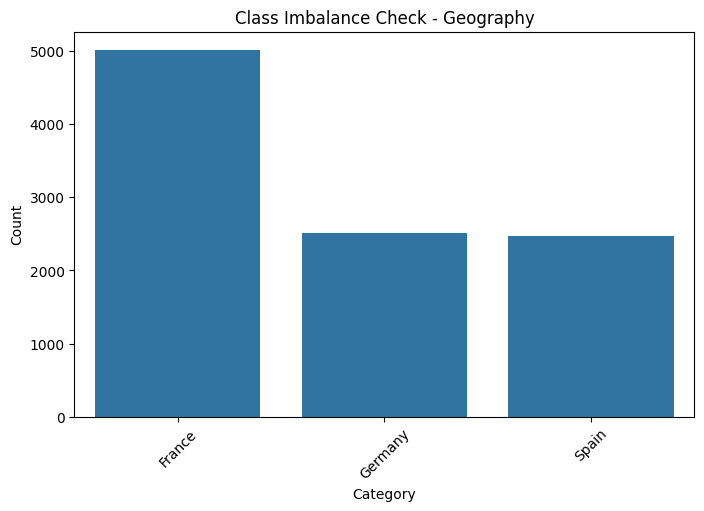

In [107]:
# Display class imbalance
df_categorical = pd.DataFrame({
    "Category": dataset["Geography"].value_counts().index,
    "Count": dataset["Geography"].value_counts().values
})

plt.figure(figsize=(8, 5))
sns.barplot(x="Category", y="Count", data=df_categorical)
plt.title("Class Imbalance Check - Geography")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

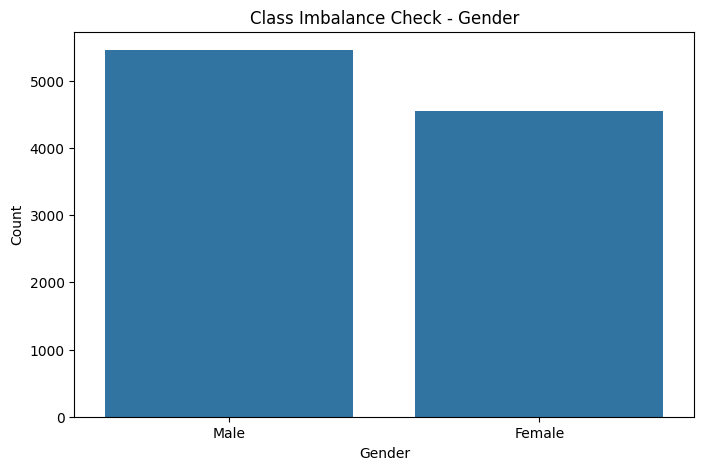

In [108]:
# Display class imbalance in Gender
df_gender = pd.DataFrame({
    "Gender": dataset["Gender"].value_counts().index,
    "Count": dataset["Gender"].value_counts().values
})

plt.figure(figsize=(8, 5))
sns.barplot(x="Gender", y="Count", data=df_gender)
plt.title("Class Imbalance Check - Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


<Axes: xlabel='Age', ylabel='Count'>

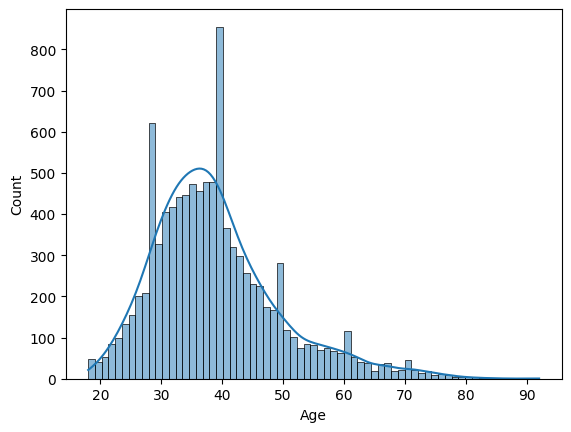

In [109]:

# KDE plot of Age
sns.histplot(dataset["Age"], kde = True)

<Axes: xlabel='Tenure', ylabel='Count'>

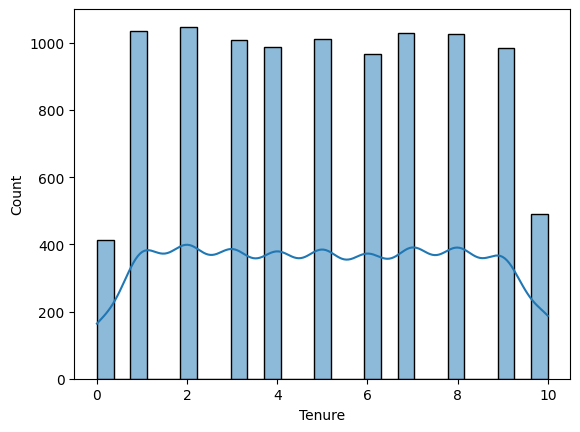

In [110]:
# KDE plot of Tenure - The number of years the customer has been with the bank
sns.histplot(dataset["Tenure"], kde = True)

- The dataset is not evenly distributed across geographical regions, with France dominating.
- Gender is relatively balanced, though there is a slight male dominance.

### Conclusions:
 - Data usability assessment: The dataset is usable as it was specifically generated for data science labs.
 - Identify required modifications or corrections: No modifications are needed since it is synthetic data.
 - Detect class imbalances: The dataset has an uneven distribution in Geography, with France being the majority. Gender distribution is relatively balanced but slightly male-dominant. These factors should be considered in model development.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

#### FIGURE 2.7 Modified scatterplot (page 45)

In [111]:
# Generate synthetic data
# Adjust data distribution to better match a U-shaped (parabolic) curve
np.random.seed(42)

# Generate miles driven values
x = np.linspace(500, 4000, 50)

# Create a U-shaped distribution for cost per mile (parabolic)
y_base = 1.0 + ((x - 2000) ** 2) / 3e6  # Parabolic shape with a minimum around 2000 miles

# Add some random noise
cost_per_mile = y_base + np.random.uniform(-0.2, 0.2, len(x))

# Determine colors based on threshold
colors = ['orange' if c > 1.5 else 'gray' for c in cost_per_mile]


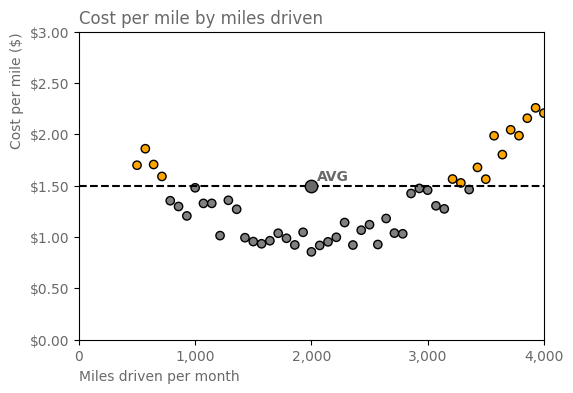

In [112]:
# Plot
plt.figure(figsize=(6, 4))
plt.scatter(x, cost_per_mile, c=colors, edgecolors='black')

# Add the average cost per mile line
plt.axhline(avg_cost, color='black', linestyle='dashed')

# Add the "AVG" point as a dark gray dot
plt.scatter([2000], [avg_cost], color='dimgray', s=80, edgecolors='black', zorder=3)
plt.text(2050, avg_cost + 0.05, "AVG", fontsize=10, fontweight='bold', color='dimgray')

# Labels with dark gray color
plt.xlabel("Miles driven per month", color='dimgray', loc='left')
plt.ylabel("Cost per mile ($)", color='dimgray', loc='top')
plt.title("Cost per mile by miles driven", color='dimgray', loc='left')

# Formatting
plt.xticks([0, 1000, 2000, 3000, 4000], labels=['0', '1,000', '2,000', '3,000', '4,000'], color='dimgray')
plt.yticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0], labels=["$0.00", "$0.50", "$1.00", "$1.50", "$2.00", "$2.50", "$3.00"], color='dimgray')
plt.xlim(0, 4000)
plt.ylim(0, 3)

# Show plot
plt.show()
